In [2]:
import pandas as pd

df = pd.read_csv('data/iris_data_challenge.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.1,2.8,4.7,1.2
1,5.7,3.8,1.7,0.3
2,7.7,2.6,6.9,NaN
3,6.0,2.9,4.5,1.5
4,NaN,2.8,4.8,1.4
...,...,...,...,...
145,6.1,2.8,NaN,1.3
146,4.9,2.5,4.5,1.7
147,5.8,4.0,1.2,0.2
148,5.8,2.6,4.0,1.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  139 non-null    float64
 1   sepal width (cm)   136 non-null    float64
 2   petal length (cm)  133 non-null    float64
 3   petal width (cm)   133 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,139.000000,136.000000,133.000000,133.000000
mean,5.812950,3.064706,3.712782,1.188722
std,0.826538,0.446970,1.806907,0.755250
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

sepal length (cm)    11
sepal width (cm)     14
petal length (cm)    17
petal width (cm)     17
dtype: int64

In [28]:
num_filas_vacias = df.isnull().all(axis=1).sum()
print(f"Número de filas completamente vacías: {num_filas_vacias}")

num_filas_con_mas_de_dos_nulos = df.isnull().sum(axis=1).gt(2).sum()
print(f"Número de filas con más de 2 valores nulos: {num_filas_con_mas_de_dos_nulos}")


Número de filas completamente vacías: 0
Número de filas con más de 2 valores nulos: 2


c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


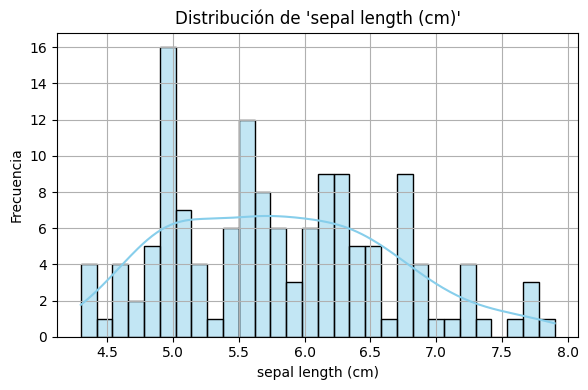

c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


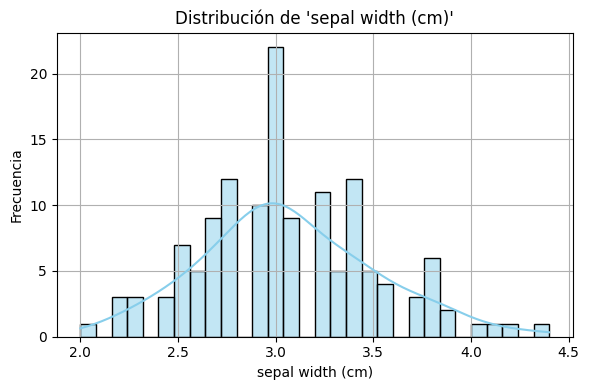

c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


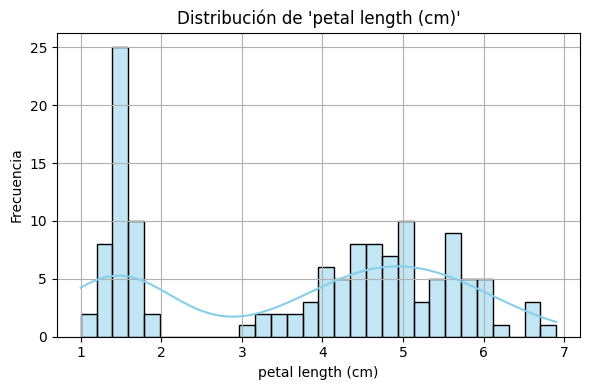

c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


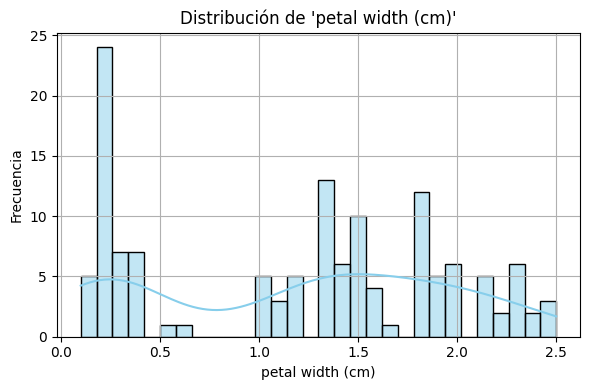

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_distributions(df, numeric_columns):
    for col in numeric_columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
        plt.title(f"Distribución de '{col}'")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_feature_distributions(df, df.select_dtypes(include=['float64', 'int64']).columns)


In [41]:
import pandas as pd
import numpy as np
import argparse
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

def load_data(path):
    return pd.read_csv(path)

def preprocess_data(df):
    numeric_df = df.select_dtypes(include=[np.number])

    # Detectamos valores nulos para luego marcarlos
    mask_missing = numeric_df.isnull()

    # Imputación KNN
    imputer = KNNImputer(n_neighbors=5)
    imputed = imputer.fit_transform(numeric_df)

    # Redondear para evitar floats con muchos decimales
    imputed = np.round(imputed, 1)

    # Normalización
    scaler = StandardScaler()
    scaled = scaler.fit_transform(imputed)

    # Reconstruir DataFrame imputado con nombres de columnas
    df_imputed = df.copy()
    df_imputed[numeric_df.columns] = imputed

    return scaled, mask_missing.values, numeric_df.columns.tolist(), df_imputed

def choose_k(X, k_max=10):
    scores = []
    distortions = []
    for k in range(2, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)))

    best_k = np.argmax(scores) + 2

    # Guardamos gráficos de evaluación
    plt.figure()
    plt.plot(range(2, 2 + len(scores)), scores, marker='o')
    plt.xlabel("Número de clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Method")
    plt.grid(True)
    plt.savefig("outputs/silhouette_scores.png")
    plt.close()

    plt.figure()
    plt.plot(range(2, 2 + len(distortions)), distortions, marker='o')
    plt.xlabel("Número de clusters (k)")
    plt.ylabel("Distorsión total (intra-cluster)")
    plt.title("Elbow Method")
    plt.grid(True)
    plt.savefig("outputs/elbow_method.png")
    plt.close()

    return best_k

def cluster_data(X, algorithm="kmeans", k=None):
    if algorithm == "kmeans":
        model = KMeans(n_clusters=k, random_state=42)
    elif algorithm == "dbscan":
        model = DBSCAN(eps=0.5, min_samples=2)
    else:
        raise ValueError(f"Algoritmo no soportado: {algorithm}")

    labels = model.fit_predict(X)
    return labels, model

def reduce_dimensions(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    return X_reduced

def visualize_clusters(X_reduced, labels, mask_missing, output_path, is_3d=False):
    if is_3d and X_reduced.shape[1] >= 3:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='viridis', s=50)
        for i in range(X_reduced.shape[0]):
            if mask_missing[i].any():
                ax.scatter(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], facecolors='none', edgecolors='red', s=100, linewidths=1.5)
        ax.set_title("Visualización de Clusters (3D)")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")
    else:
        plt.figure(figsize=(8, 6))
        scatter_original = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50, label="Original")
        scatter_imputados = plt.scatter(X_reduced[mask_missing.any(axis=1), 0],
                                        X_reduced[mask_missing.any(axis=1), 1],
                                        facecolors='none', edgecolors='red', s=100, linewidths=1.5,
                                        label="Imputados")
        plt.title("Visualización de Clusters (2D) con imputación KNN")
        plt.xlabel("Componente principal 1")
        plt.ylabel("Componente principal 2")
        plt.grid(True)
        plt.legend(loc='upper right')

    plt.savefig(output_path)
    plt.close()

def plot_cluster_centers(model, feature_names):
    if not hasattr(model, "cluster_centers_"):
        print("[AVISO] El modelo no tiene centroides (no es KMeans).")
        return

    centers_df = pd.DataFrame(model.cluster_centers_, columns=feature_names)
    centers_df.index = [f"Cluster {i}" for i in range(centers_df.shape[0])]

    plt.figure(figsize=(10, 6))
    sns.heatmap(centers_df, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Valores promedio de cada feature por cluster (centroides)")
    plt.ylabel("Clusters")
    plt.xlabel("Features")
    plt.tight_layout()
    plt.savefig("outputs/cluster_centers_heatmap.png")
    plt.close()

from scipy.stats import f_oneway

def analyze_feature_importance(df, labels, feature_cols):    
    df_clustered = df.copy()
    df_clustered['cluster'] = labels
    
    print("\nAnálisis de importancia de variables por clusters (ANOVA):\n")

    anova_results = {}
    
    for feature in feature_cols:
        groups = [group[feature].values for name, group in df_clustered.groupby('cluster')]
        f_stat, p_val = f_oneway(*groups)
        anova_results[feature] = {"F": f_stat, "p": p_val}    
    return anova_results

def plot_anova_boxplots(df, labels, anova_results):
    import matplotlib.pyplot as plt
    import seaborn as sns

    df_plot = df.copy()
    df_plot['cluster'] = labels
    variables = list(anova_results.keys())

    plt.figure(figsize=(16, 12))
    for i, var in enumerate(variables, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x='cluster', y=var, data=df_plot, palette='Set2')
        plt.title(f"{var}\nF={anova_results[var]['F']:.3f}, p={anova_results[var]['p']:.4f}")
        plt.xlabel("Cluster")
        plt.ylabel(var)

    plt.suptitle("Distribución de variables por cluster con resultados ANOVA", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("outputs/anova_boxplots_clusters.png")
    plt.close()


        
def save_result(df_original, labels, output_path):
    df_result = df_original.copy()
    df_result['cluster'] = labels
    df_result.to_csv(output_path, index=False)

def main(path_csv, is_3d, algorithm):
    print(f"[INFO] Cargando datos desde {path_csv}")
    df = load_data(path_csv)

    print("[INFO] Preprocesando datos con imputación KNN...")
    X_processed, mask_missing, feature_cols, df_imputed = preprocess_data(df)

    if algorithm == "kmeans":
        print("[INFO] Determinando cantidad óptima de clusters...")
        k = choose_k(X_processed)
        print(f"[INFO] Número de clusters elegido: {k}")
    else:
        k = None

    print(f"[INFO] Ejecutando clustering con algoritmo: {algorithm}...")
    labels, model = cluster_data(X_processed, algorithm=algorithm, k=k)
    
    anova_results = analyze_feature_importance(df_imputed, labels, feature_cols)
    plot_anova_boxplots(df_imputed, labels, anova_results)



    print("[INFO] Guardando resultados...")
    output_csv = "outputs/resultado_cluster.csv"
    save_result(df_imputed, labels, output_csv)

    if X_processed.shape[1] >= 2:
        print("[INFO] Generando visualización...")
        n_components = 3 if is_3d else 2
        X_reduced = reduce_dimensions(X_processed, n_components=n_components)
        visualize_clusters(X_reduced, labels, mask_missing, "outputs/clusters_visual.png", is_3d=is_3d)

    if algorithm == "kmeans":
        print("[INFO] Analizando importancia de features según centroides...")
        plot_cluster_centers(model, feature_cols)

    print("[✔] Proceso completado. Resultados guardados en: outputs/")

# Ejecución directa para pruebas
main("data/iris_data_challenge.csv", is_3d=False, algorithm="kmeans")

# Para usar desde terminal:
# if __name__ == "__main__":
#     parser = argparse.ArgumentParser(description="Agente autónomo de clusterización")
#     parser.add_argument("path_csv", type=str, help="Ruta al archivo CSV de entrada")
#     parser.add_argument("--is_3d", action='store_true', help="Si se especifica, se visualiza en 3D")
#     parser.add_argument("--algorithm", type=str, default="kmeans", choices=["kmeans", "dbscan"], help="Algoritmo de clustering a utilizar")
#     args = parser.parse_args()

#     main(args.path_csv, is_3d=args.is_3d, algorithm=args.algorithm)


[INFO] Cargando datos desde data/iris_data_challenge.csv
[INFO] Preprocesando datos con imputación KNN...
[INFO] Determinando cantidad óptima de clusters...


c:\Users\Felipe\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Felipe\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[INFO] Número de clusters elegido: 2
[INFO] Ejecutando clustering con algoritmo: kmeans...

Análisis de importancia de variables por clusters (ANOVA):



c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

[INFO] Guardando resultados...
[INFO] Generando visualización...
[INFO] Analizando importancia de features según centroides...
[✔] Proceso completado. Resultados guardados en: outputs/


c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

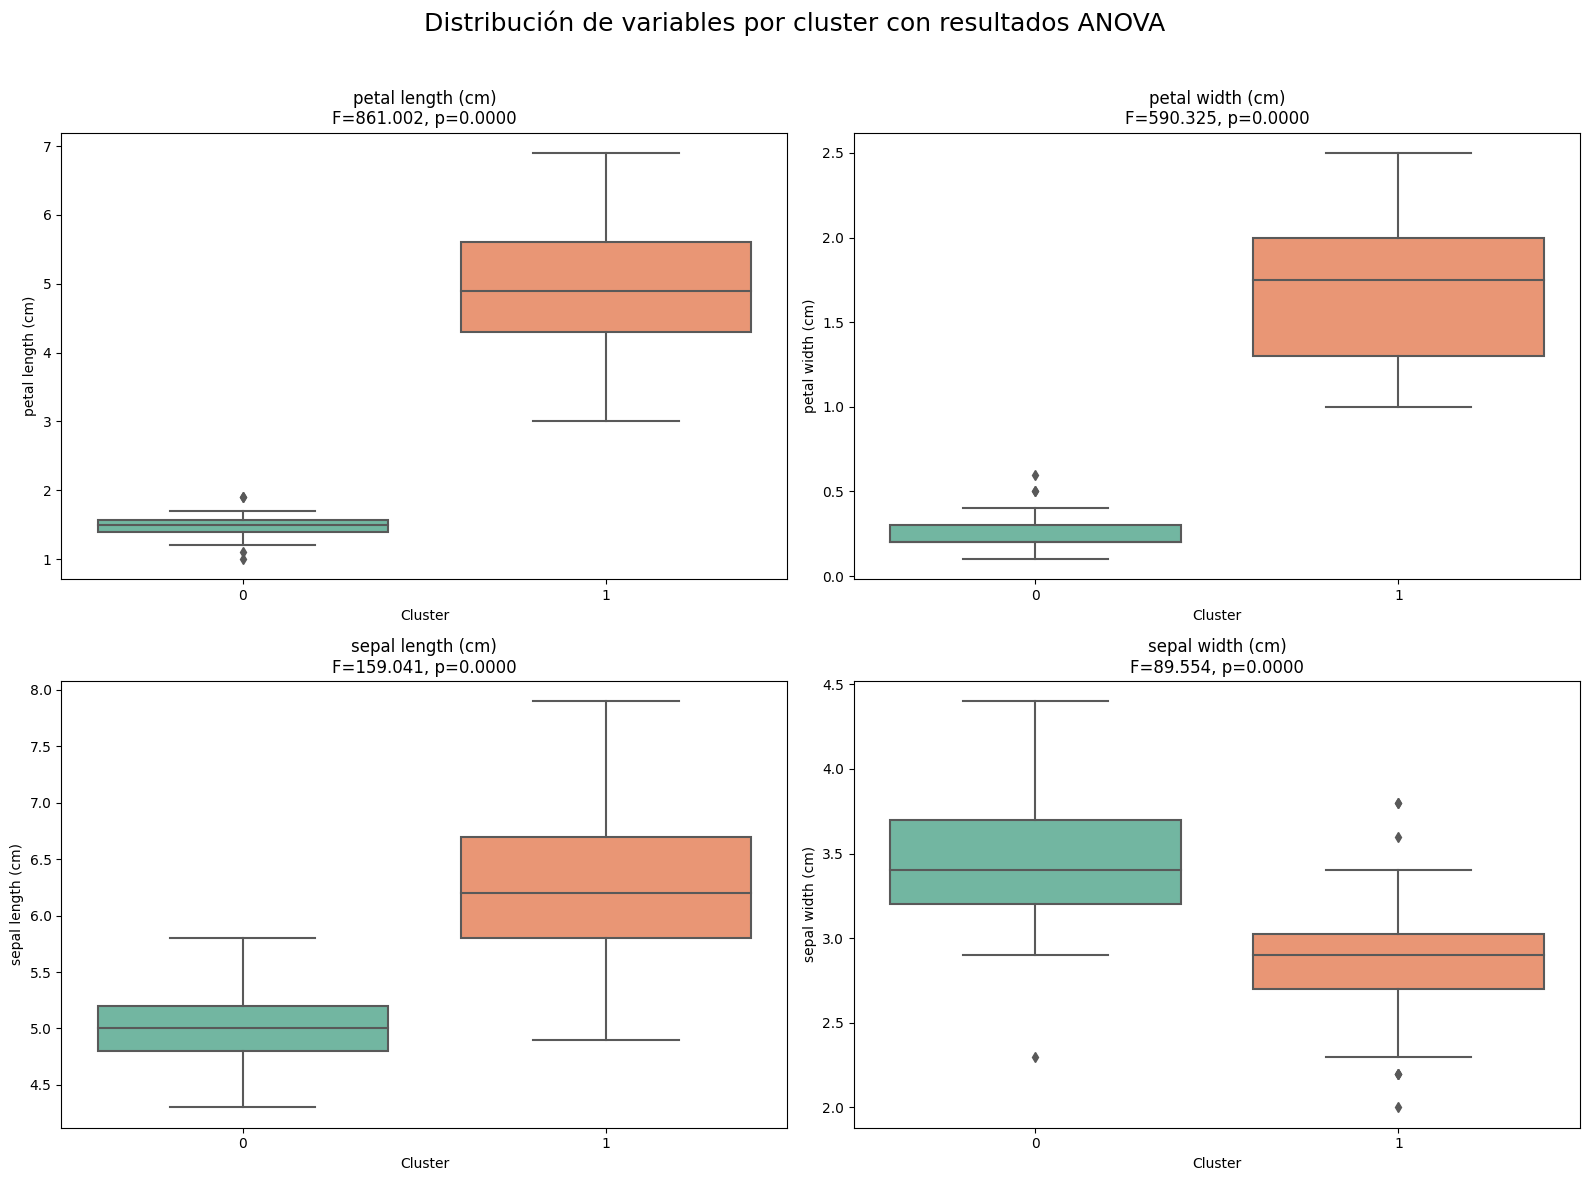

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('outputs/resultado_cluster.csv')
# Suponiendo que 'df' es tu DataFrame original con variables y columna 'cluster'
# Y que tenés un diccionario con resultados de ANOVA así:
anova_results = {
    'petal length (cm)': {'F': 861.002, 'p': 0.0000},
    'petal width (cm)': {'F': 590.325, 'p': 0.0000},
    'sepal length (cm)': {'F': 159.041, 'p': 0.0000},
    'sepal width (cm)': {'F': 89.554, 'p': 0.0000},
}

variables = list(anova_results.keys())

plt.figure(figsize=(16, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='cluster', y=var, data=df, palette='Set2')
    plt.title(f"{var}\nF={anova_results[var]['F']:.3f}, p={anova_results[var]['p']:.4f}")
    plt.xlabel("Cluster")
    plt.ylabel(var)

plt.suptitle("Distribución de variables por cluster con resultados ANOVA", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
